Task 6: K-Nearest Neighbors (KNN) Classification

--- 1. Data Loading and Preprocessing ---
Training set shape (scaled): (105, 4)
Testing set shape (scaled): (45, 4)
----------------------------------------
--- 2. & 3. Finding Optimal K and Model Training ---
Optimal K: 9 (Test Accuracy: 0.9556)
----------------------------------------


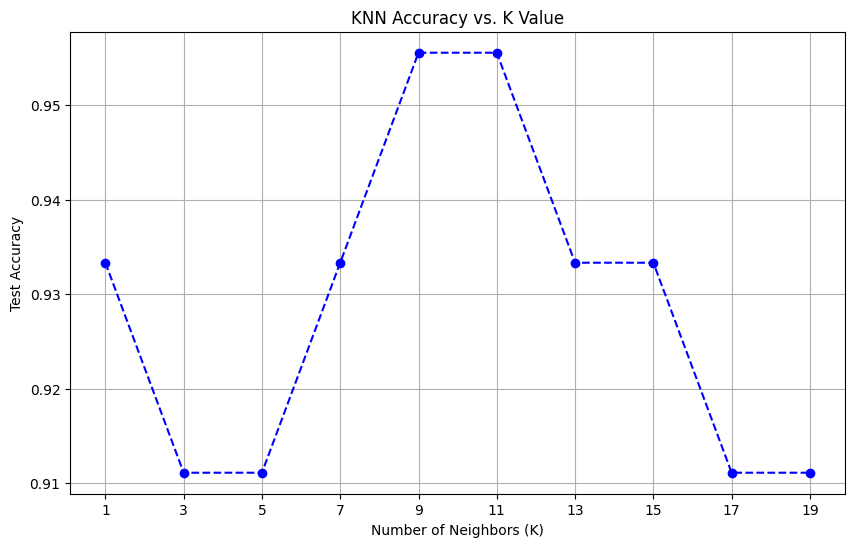

--- 4. Model Evaluation (K = 9) ---
Final Model Accuracy: 0.9556

Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


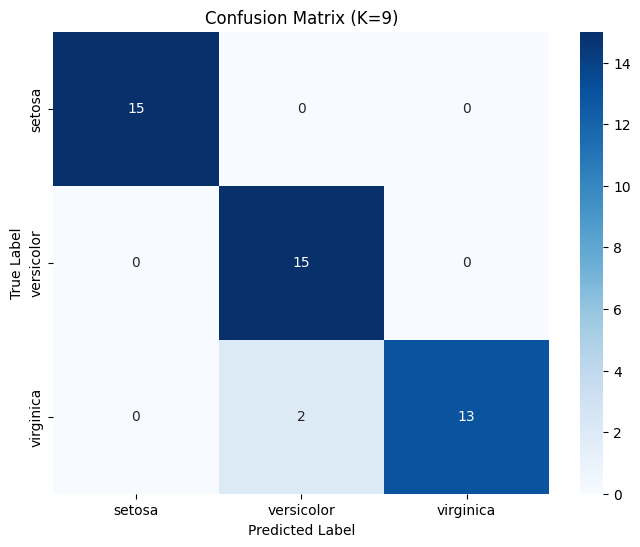


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

----------------------------------------
--- 5. Decision Boundary Visualization (K=9) ---


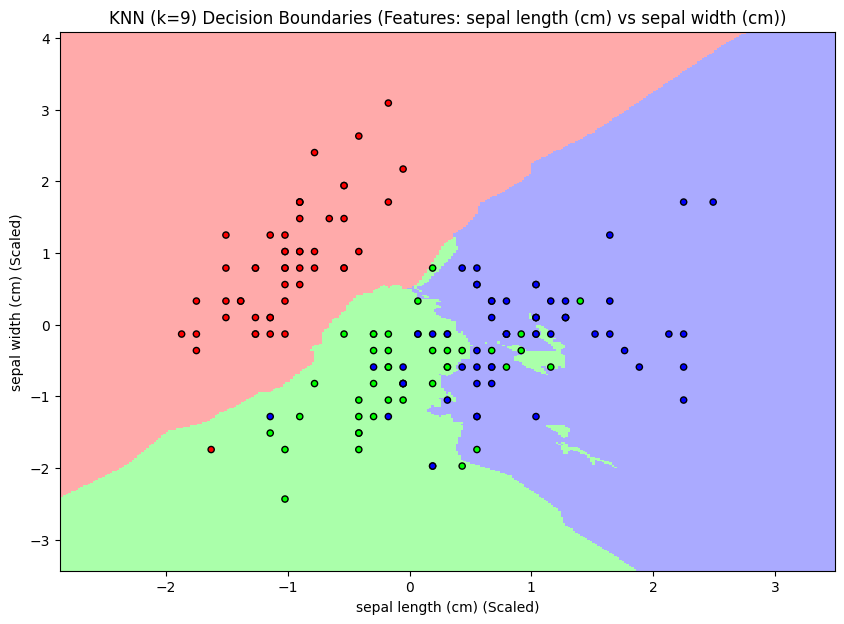

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# --- 1. Load Data and Normalize Features ---
print("--- 1. Data Loading and Preprocessing ---")
# Load the Iris dataset, which is conveniently built into scikit-learn
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Normalize/Standardize the features (Crucial for distance-based algorithms like KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape (scaled): {X_train_scaled.shape}")
print(f"Testing set shape (scaled): {X_test_scaled.shape}")
print("-" * 40)


# --- 2. & 3. Experiment with different values of K and train the model ---
print("--- 2. & 3. Finding Optimal K and Model Training ---")

# Determine the optimal K (typically an odd number, up to sqrt(N))
k_range = range(1, 20, 2)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Find the best K
optimal_k = k_range[np.argmax(accuracies)]
optimal_accuracy = np.max(accuracies)

print(f"Optimal K: {optimal_k} (Test Accuracy: {optimal_accuracy:.4f})")
print("-" * 40)

# Plot K vs. Accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o', linestyle='--', color='blue')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Test Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# --- 4. Evaluate Model using Optimal K ---
print("--- 4. Model Evaluation (K = {}) ---".format(optimal_k))

# Re-train the model with the optimal K
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train_scaled, y_train)
y_pred_final = final_knn.predict(X_test_scaled)

# Accuracy Score
print(f"Final Model Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=target_names,
    yticklabels=target_names
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (K={optimal_k})')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, target_names=target_names))
print("-" * 40)


# --- 5. Visualize Decision Boundaries (using only 2 features for 2D plot) ---
print("--- 5. Decision Boundary Visualization (K={}) ---".format(optimal_k))

# Use only the first two features for visualization (Sepal Length and Sepal Width)
X_vis = X[:, :2]
y_vis = y

# Standardize the features
scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)

# Train the KNN classifier
knn_vis = KNeighborsClassifier(n_neighbors=optimal_k)
knn_vis.fit(X_vis_scaled, y_vis)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the training points
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(
    f"KNN (k={optimal_k}) Decision Boundaries (Features: {feature_names[0]} vs {feature_names[1]})"
)
plt.xlabel(feature_names[0] + ' (Scaled)')
plt.ylabel(feature_names[1] + ' (Scaled)')
plt.show()